# Analiza danych `GlobalTemperatures`  
## pochodzącego z zestawu  `Climate Change: Earth Surface Temperature Data`

### Przedstawienie danych
<br>
<div style="text-align: justify">
Zestaw pozwala na badanie trendów klimatycznych. Plik GlobalTemperatures.csv prezentuje <b>globalne temperatury oceaniczne oraz lądowe od roku 1750 dla średniej temperatury lądu oraz 1850 dla maksymalnej i minimalnej temperatury lądu oraz globalnych temperatur oceanu i lądu aż do roku 2015.</b>
<br><br>
Dane łączą <b>1,6 miliarda raportów temperatury z 16 istniejących archiwów</b>. Wczesne dane zostały zebrane przez techników używających termometrów rtęciowych. W latach 40. XX wieku budowa lotnisk spowodowała przeniesienie wielu stacji pogodowych. W latach 80. wprowadzono termometru elektroniczne. Biorąc pod uwagę złożoność pochodzenia danych, niezwykle istotne okazuje się analiza danych i ich odpowiednie przygotowywanie przez wyznaczeniem przy ich użyciu trendów klimatycznych w ramach zagadnienia regresji.
</div>

### Znaczenie cech (atrybutów)

- `dt` : data pomiaru w formacie yyyy-mm-dd
- `LandAverageTemperature` : średnia temperatura lądu wyrażona w stopniach Celsjusza
- `LandAverageTemperatureUncertainty`: 
- `LandMaxTemperature`: średnia maksymalna temperatura lądu wyrażona w stopniach Celsjusza
- `LandMaxTemperatureUncertainty`: 
- `LandMinTemperature`: średnia minimalna temperatura lądu wyrażona w stopniach Celsjusza
- `LandMinTemperatureUccertainty`: 
- `LandAndOceanAverageTemperature`: średnia temperatura lądu i oceanu wyrażona w stopniach Celsjusza
- `LandAndOceanAverageTemperatureUccertainty`: 


### Import danych do stuktury DataFrame biblioteki Pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6421335B0>,
      dtype=object)

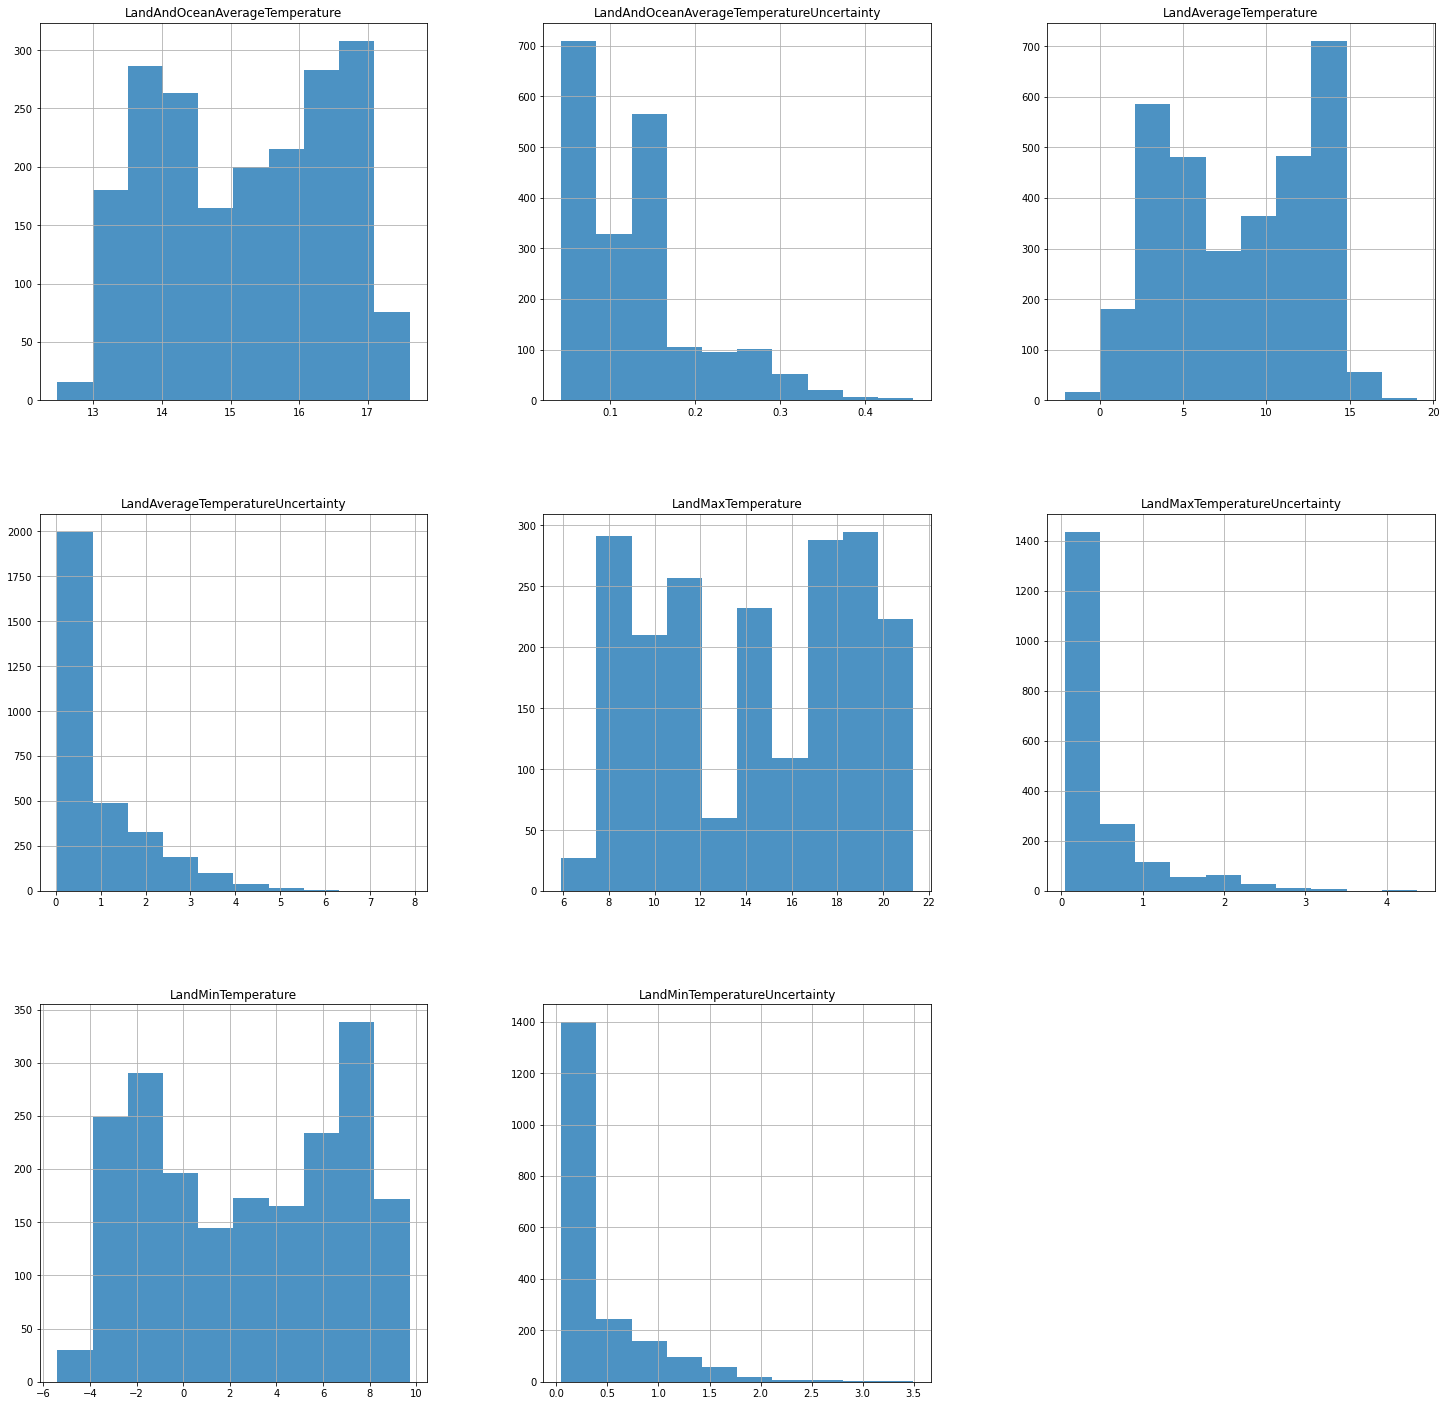

In [27]:
import pandas as pd

data = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])

### Zwięzłe podsumowanie danych

Na dane składa się 3192 pomiarów temperatur opisanych dziewięcioma cechami. Wartości wszystkich cech, poza `dt` tj. datą wykonanego pomiaru, są typu float64 - liczby zmiennoprzecinkowe zapisane na 64 bitach. Wykorzystywana do przechowania danych pamięć to 224.6 KB.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

### Prezentacja pierwszych rekordów zestawu


In [3]:
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


### Statystyka opisowa zestawu

Statystyka opisowa przedstawia dla każdej cechy zestawu będącego danymi liczbowymi:
- `count` : liczbę rekordów, 
- `mean` : średnią, 
- `std` : odchylenie standardowe
- `min` : wartość najmniejszą
- `25%` : percentyl dolny - percentyl 25
- `50%` : percentyl 50, równy medianie
- `75%` : percentyl górny - percentyl 75
- `max`: wartość największą

In [4]:
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


### Brakujące dane

Brakujące wartości prezentuje wywołanie metody `isna()`, która jako rezultat zwraca obiekt takiego samego typu, czyli DataFrame biblioteki Pandas, w którym wartości są mapowane na `True` i `False`.

In [5]:
data.isna().head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,False,False,False,True,True,True,True,True,True
1,False,False,False,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True
4,False,False,False,True,True,True,True,True,True


#### Liczba brakujących danych to odpowiednio: 
- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0 - dla daty pomiaru
- &nbsp;&nbsp;&nbsp;&nbsp;12 - dla średniej temperatury lądu oraz XXXXXX
- 1200 - dla pozostałych

In [6]:
data.isna().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

#### Procent brakujących danych to odpowiednio: 
- &nbsp;&nbsp;0.0% - dla daty pomiaru
- &nbsp;&nbsp;0.4% - dla średniej temperatury lądu oraz XXXXXX
- 37.6% - dla pozostałych

In [7]:
data.isna().sum() / len(data)

dt                                           0.000000
LandAverageTemperature                       0.003759
LandAverageTemperatureUncertainty            0.003759
LandMaxTemperature                           0.375940
LandMaxTemperatureUncertainty                0.375940
LandMinTemperature                           0.375940
LandMinTemperatureUncertainty                0.375940
LandAndOceanAverageTemperature               0.375940
LandAndOceanAverageTemperatureUncertainty    0.375940
dtype: float64

### Histogramy

Histogram pozwala w graficzny sposób przedstawić rozkład empiryczny cechy. Przedstawienia liczebności  danych w zadanych przedziałach badanej zmiennej. Główne wnioski dla kolejnych cech:

- `LandAndOceanAverageTemperature`: 
    * rozkład dwumodalny
    * najwięcej wystąpień (ponad 300) mają wartości z zakresu około (16.6, 17.1)
    * kolejne pod względem liczby wystąpień (280) są wartości z zakresów około (13.5, 14, 0.16), (16.1, 16.6)
    * dla kolejnych przedziałow liczba wystąpień skokowo maleje
    * wartości poniżej 13 oraz powyżej 17.5 praktycznie nie występują 
<br><br>
- `LandAndOceanAverageTemperatureUccertainty`:
    * rozkład prawostronnie skośny
    * najwięcej wystąpień (ponad 700) mają wartości z zakresu około (0.035, 0.085)
    * kolejne pod względem liczby wystąpień (ponad 500) są wartości z zakresu około (0.135, 0.16)
    * dla kolejnych przedziałow liczba wystąpień skokowo maleje
    * wartości poniżej 0.035 oraz powyżej 0.4 praktycznie nie występują 
<br><br>
- `LandAverageTemperature` :
    * rozkład dwumodalny
    * najwięcej wystąpień (ponad 700) mają wartości z zakresu około (13, 15)
    * kolejne pod względem liczby wystąpień (prawie 600) są wartości z zakresu około (2, 4)
    * najrzadziej występują wartości poniżej 0 oraz powyżej 17 
<br><br>
- `LandAverageTemperatureUncertainty`:
    * rozkład prawostronnie skośny
    * najwięcej wystąpień (2 000) mają wartości z zakresu około (0, 0.8)
    * kolejne pod względem liczby wystąpień (500) są wartości z zakresu około (0.8, 1.5)
    * dla kolejnych przedziałow liczba wystąpień skokowo maleje
    * wartości poniżej 0 oraz powyżej 5 praktycznie nie występują 
<br><br>
- `LandMaxTemperature`: 
    * najwięcej wystąpień (po prawie 300) mają wartości z zakresów około (7.5, 9), (15, 18), (18, 20)
    * najmniej wystąpień (25) mają wartości z zakresu około (6, 7.5)
    * brak wystąpień ma miejsce dla wartości poniżej 6 oraz powyżej 21.5 
<br><br>
- `LandMaxTemperatureUncertainty`: 
    * rozkład prawostronnie skośny
    * najwięcej wystąpień (ponad 1 400) mają wartości z zakresu około (0, 0.4)
    * kolejne pod względem liczby wystąpień (prawie 300) są wartości z zakresu około (0.4, 0.9)
    * dla kolejnych przedziałow liczba wystąpień skokowo maleje
    * wartości poniżej 0 oraz powyżej 3 praktycznie nie występują 
<br><br>
- `LandMinTemperature`:
    * rozkład dwumodalny
    * najwięcej wystąpień (380) mają wartości z zakresu około (6.8, 8.1)
    * minimalna liczba wystąpień dla większości zakresów z przedziału (-4, 9.8) to prawie 150
    * wartości poniżej -5.2 oraz powyżej 9.8 nie występują 
<br><br>
- `LandMinTemperatureUccertainty`: 
    * rozkład prawostronnie skośny
    * najwięcej wystąpień (1 400) mają wartości z zakresu około (0, 0.4)
    * kolejne pod względem liczby wystąpień (250) są wartości z zakresu około (0.4, 0.75)
    * dla kolejnych przedziałow liczba wystąpień skokowo maleje
    * wartości poniżej 0 oraz powyżej 2 praktycznie nie występują 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A64DE7EAF0>,
      dtype=object)

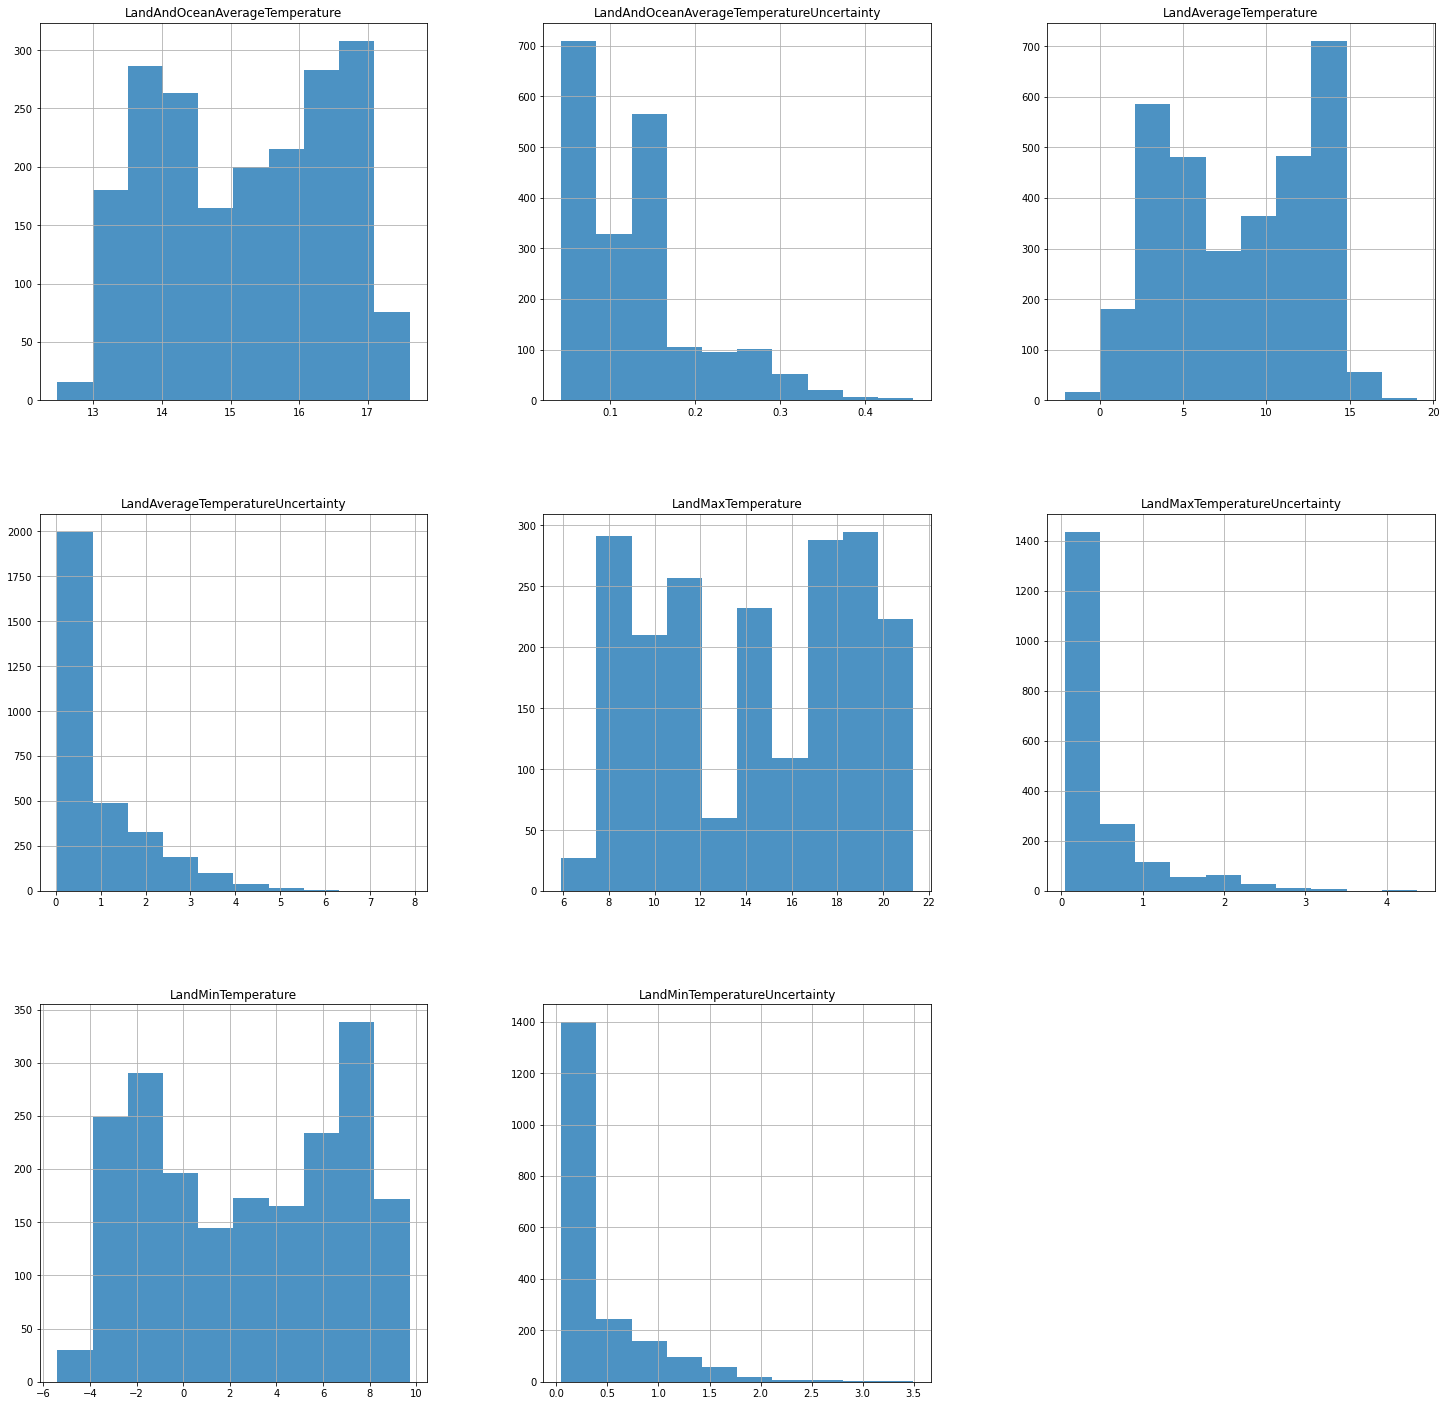

In [26]:
data.hist(figsize = (25, 25), alpha = 0.8)

### Wykres macierzowy zależności pomiędzy cechami

Wykres macierzowy pozwala na analizę zależności między jedną cechą a drugą, rozpatrywane jest również zestawienie cechy z samą sobą (przekątna macierzy). Przykładowo, zestawienie średniej temperatury lądu z średnią temperatury lądu i oceanu uwidacznia, że gdy następuje wzrost cechy drugiej, ma miejsce również wzrost cechy pierwszej.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

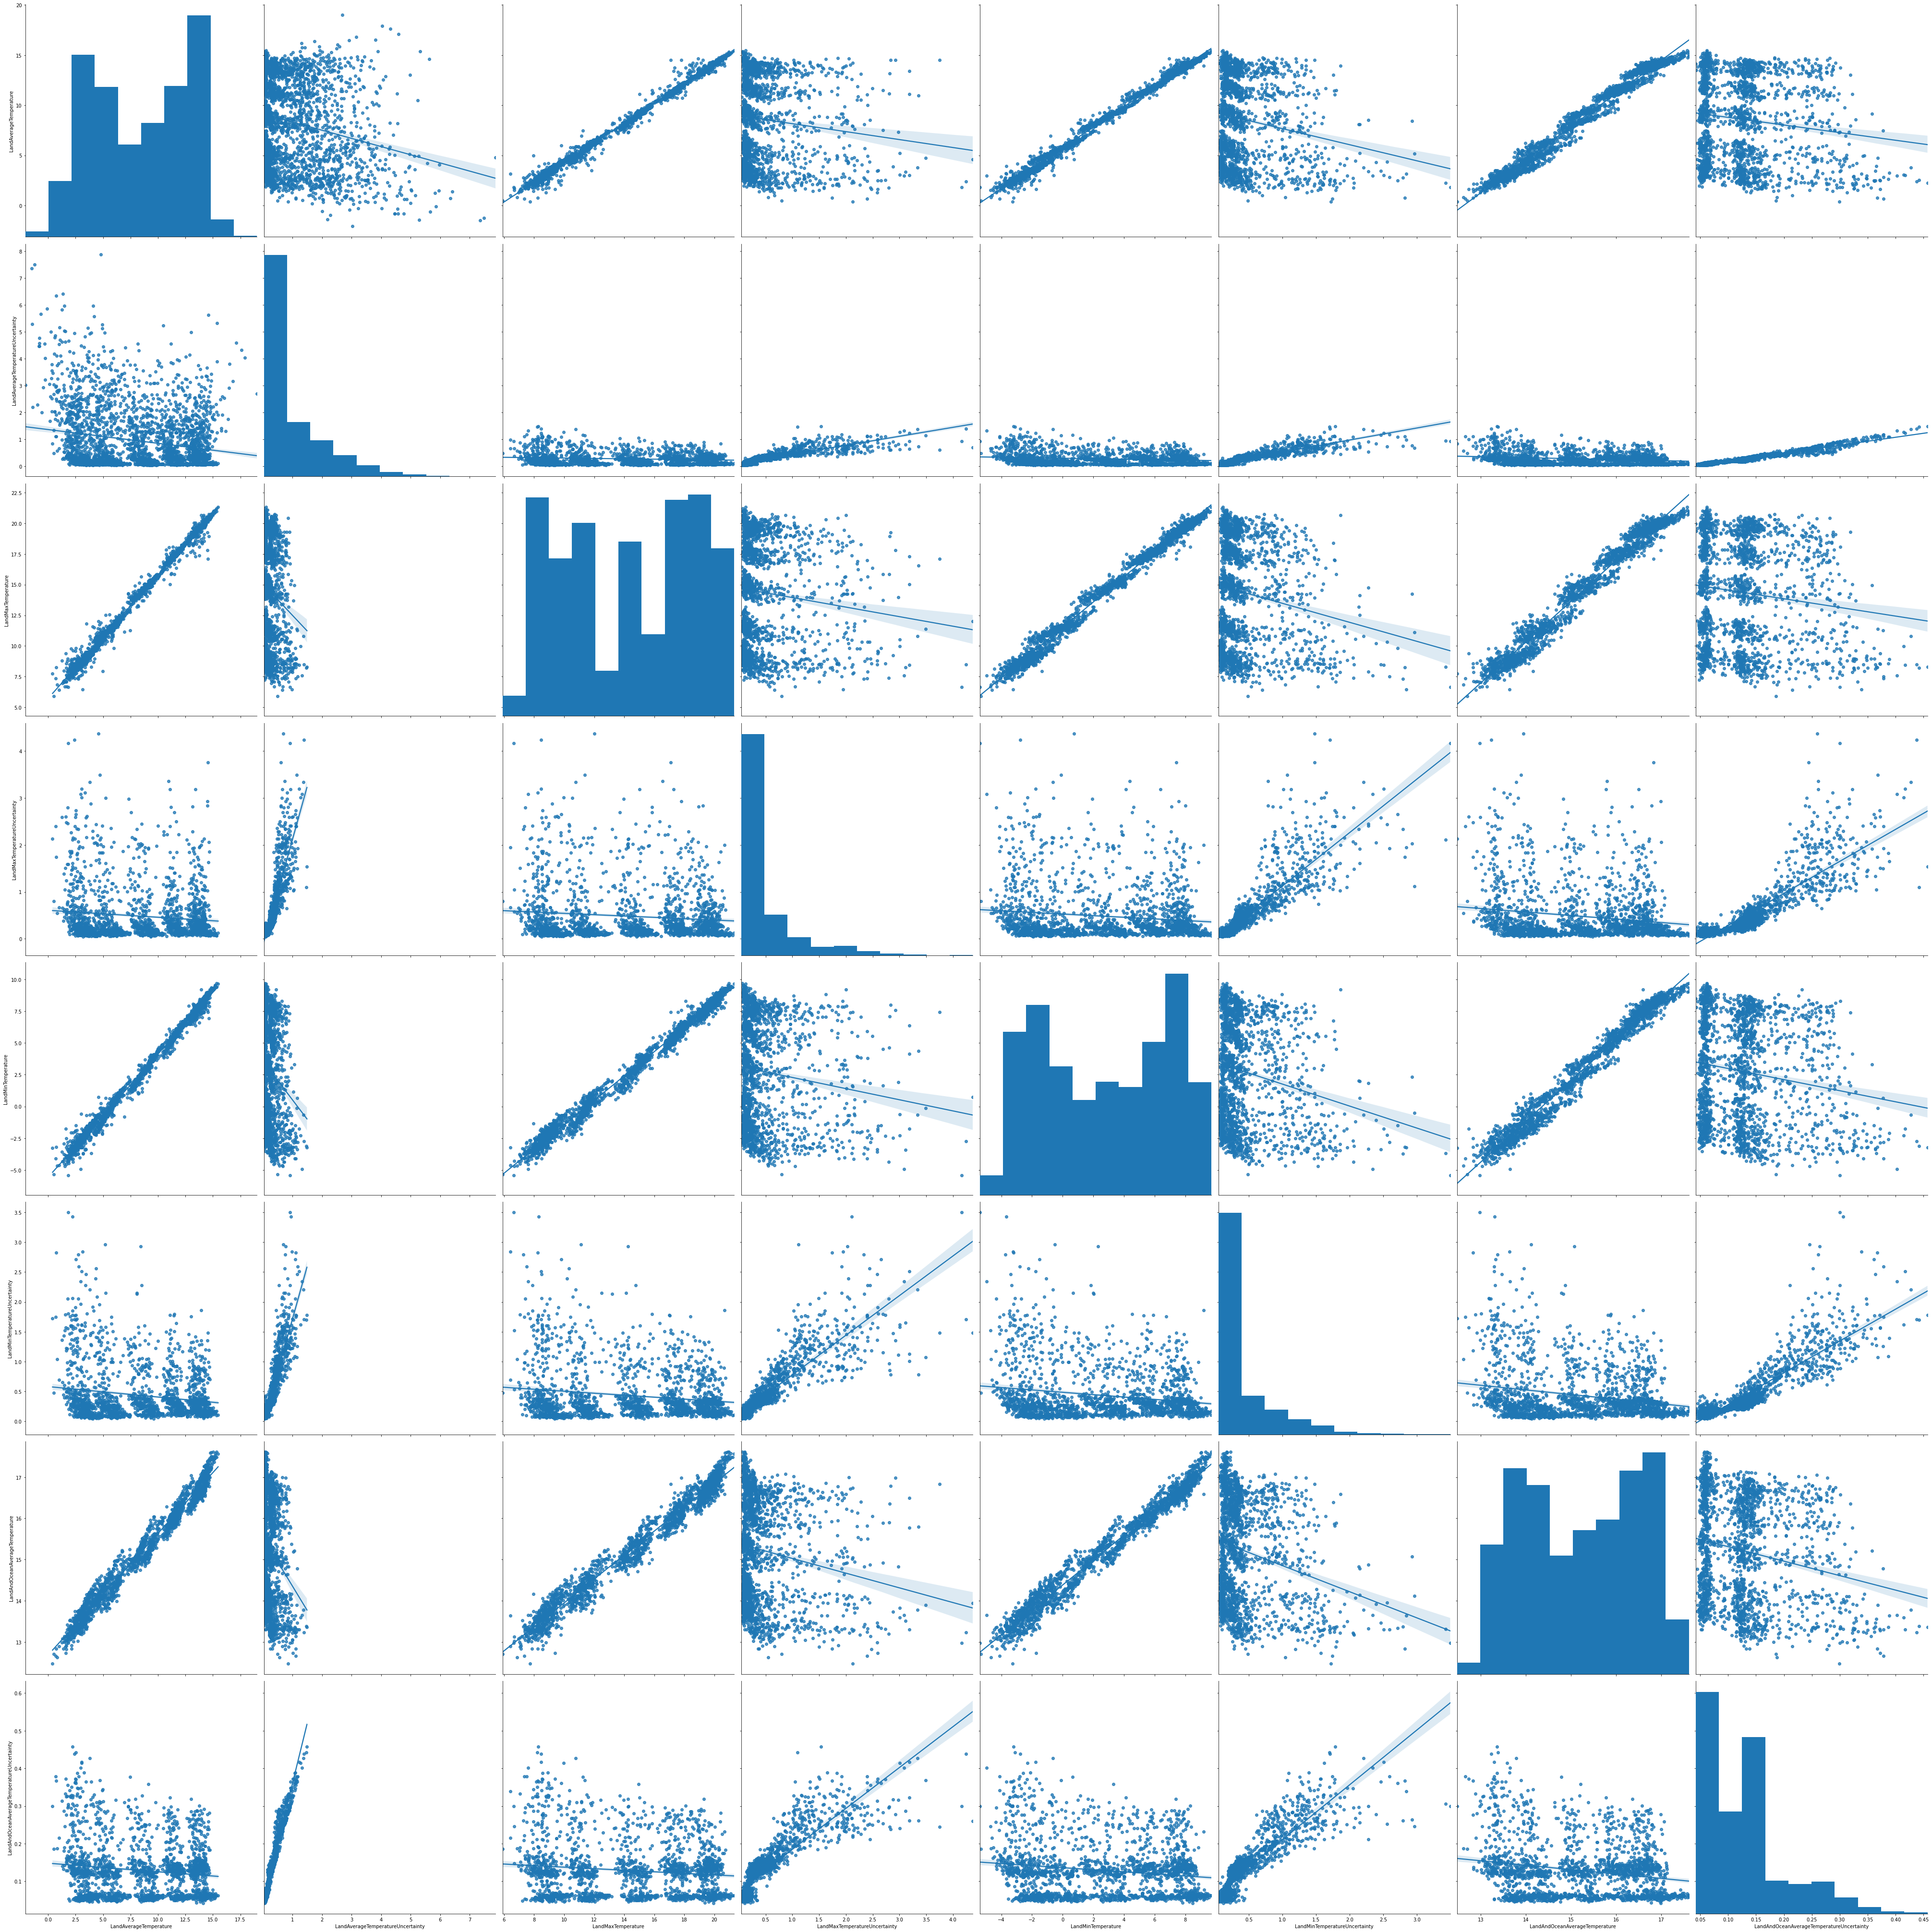

In [10]:
sns.pairplot(data = data, kind='reg', height = 7)
plt.tight_layout()
plt.show()

### Boxplot

Wykres pudełkowy prezentuje rozkład cech, ich rozproszenie oraz wartości tj. medianę, minimum, maximum, Q1 i Q3. 

Centralne położenie linii mediany wskazuje na istnienie symetrycznej dystrubucji, co ma miejsce w przypadku cech:
- `LandAverageTemperature`
- `LandMaxTemperature`
- `LandMinTemperature`
- `LandAndOceanAverageTemperature`

Cechy, w których wyróżniają się wartości odstające to (w kolejności intensywności):
- `LandAverageTemperatureUncertainty`
- `LandMaxTemperatureUncertainty`
- `LandMinTemperatureUccertainty`
- `LandAndOceanAverageTemperatureUccertainty`

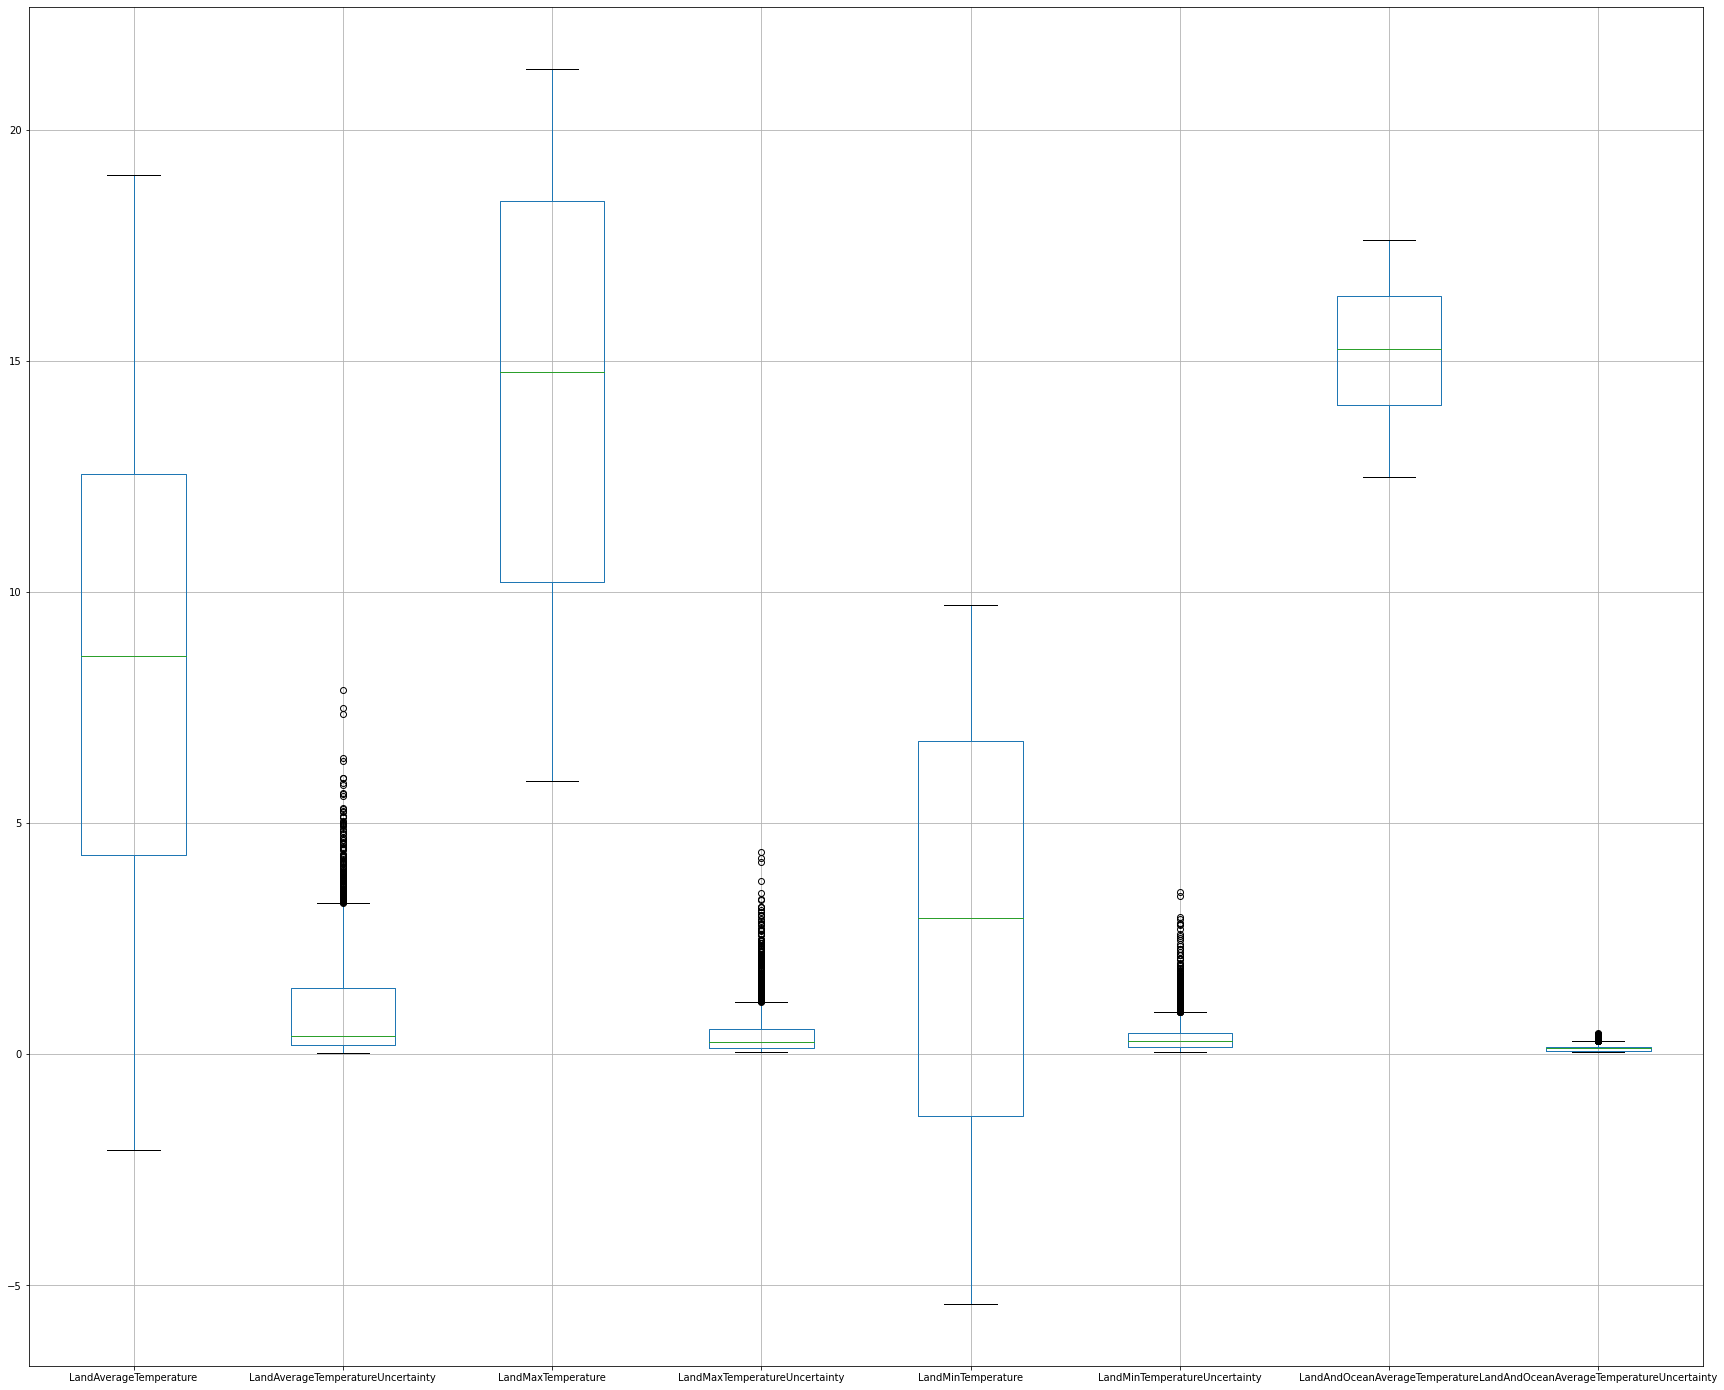

In [11]:
data.boxplot(figsize = (30, 25))

#### Tworzenie wykresów

In [12]:
def makeOnePlot(attribute, title, xlabel, color):
    plt.figure (figsize = (20, 8))
    attribute.plot(linewidth = 0.6, color = color, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Temperature in Celsius')
    plt.legend()
    plt.grid()

In [13]:
def makeThreePlot(data, title, xlabel):
    plt.figure (figsize = (20, 10))
    data.LandMaxTemperature.plot(linewidth = 0.6, color = '#DA3E3E', marker='o')
    data.LandAverageTemperature.plot(linewidth = 0.6, color = '#50A551', marker='o')
    data.LandMinTemperature.plot(linewidth = 0.6, color = '#58A0E0', marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Temperature in Celsius')
    plt.legend()
    plt.grid()

#### Pogrupowanie danych ze względu na rok wykonania pomiaru

In [14]:
tempByYear = data.groupby(data.dt.dt.year).mean()

### Wykres zmian maksymalnej temperatury lądu względem lat

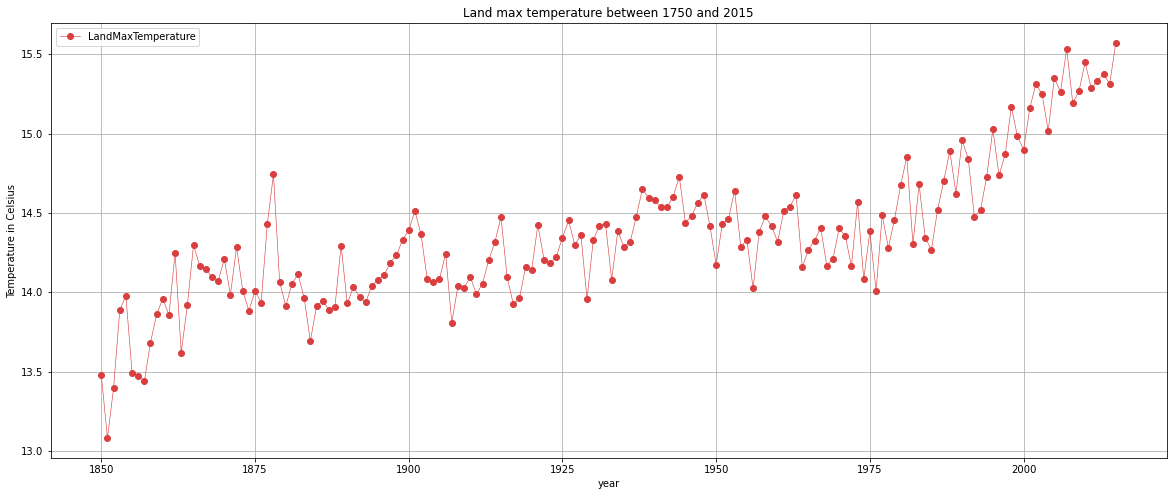

In [15]:
makeOnePlot(tempByYear.LandMaxTemperature, 'Land max temperature between 1750 and 2015', 'year', '#DA3E3E')

### Wykres zmian średniej temperatury lądu względem lat

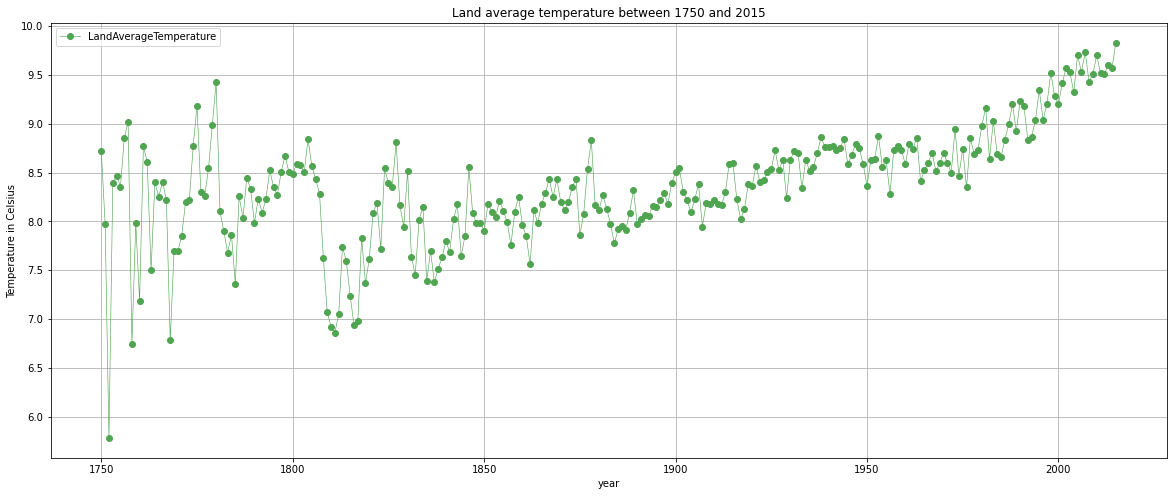

In [16]:
makeOnePlot(tempByYear.LandAverageTemperature, 'Land average temperature between 1750 and 2015', 'year', '#50A551')

### Wykres zmian minimalnej temperatury lądu względem lat

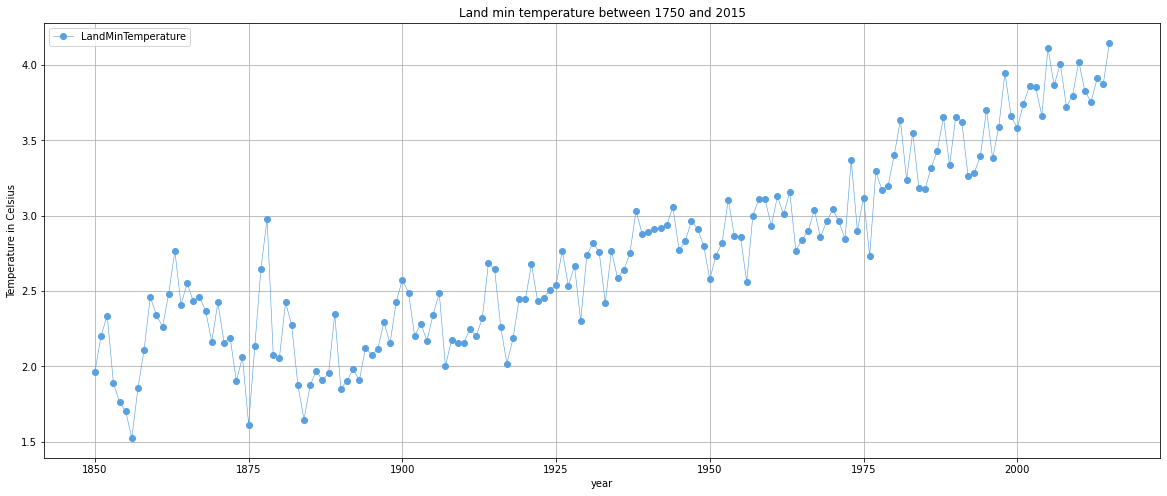

In [17]:
makeOnePlot(tempByYear.LandMinTemperature, 'Land min temperature between 1750 and 2015', 'year', '#58A0E0')

### Wykres zmian średniej temperatury lądu i oceanu względem lat

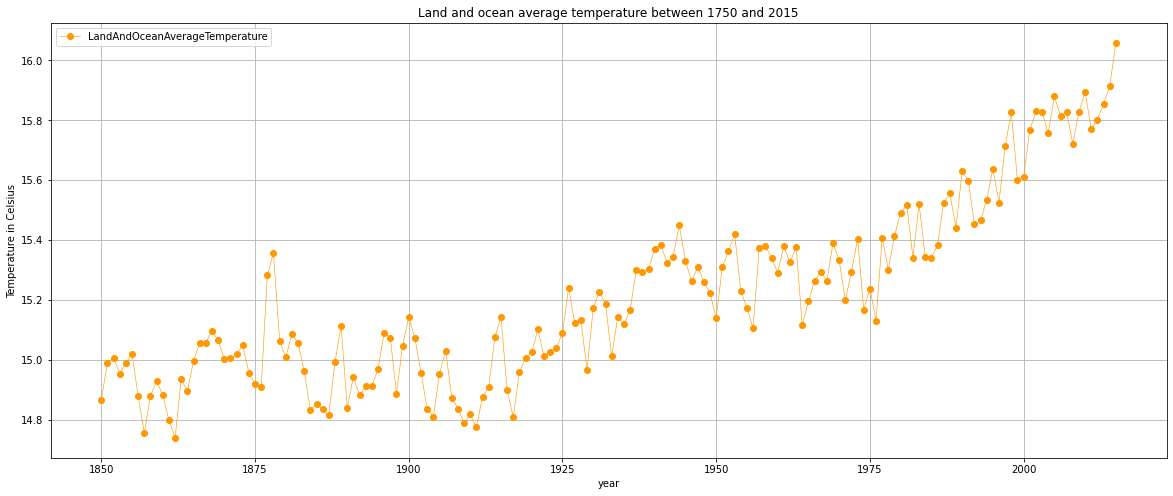

In [18]:
makeOnePlot(
    tempByYear.LandAndOceanAverageTemperature, 
    'Land and ocean average temperature between 1750 and 2015', 'year', '#FF9700'
)

### Zestawienie zmian maksymalnej, średniej oraz minimalnej temperatury lądu względem lat

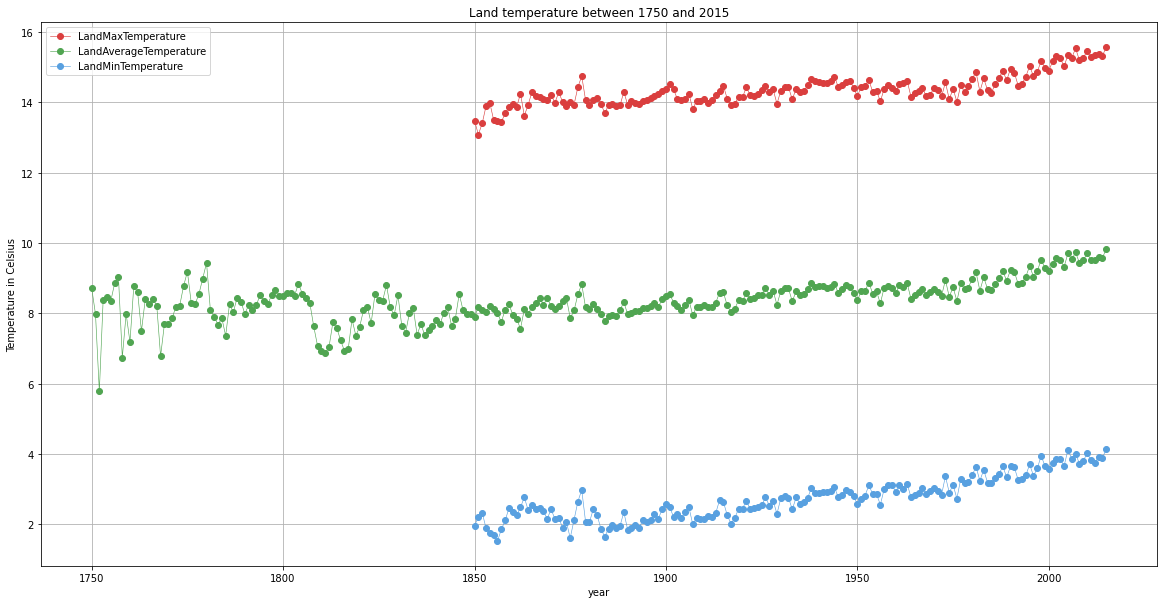

In [19]:
makeThreePlot(tempByYear, 'Land temperature between 1750 and 2015', 'year')

#### Pogrupowanie danych ze względu na miesiąc wykonania pomiaru¶

In [20]:
tempByMonth = data.groupby(data.dt.dt.month).mean()

### Wykres zmian maksymalnej temperatury lądu względem miesięcy

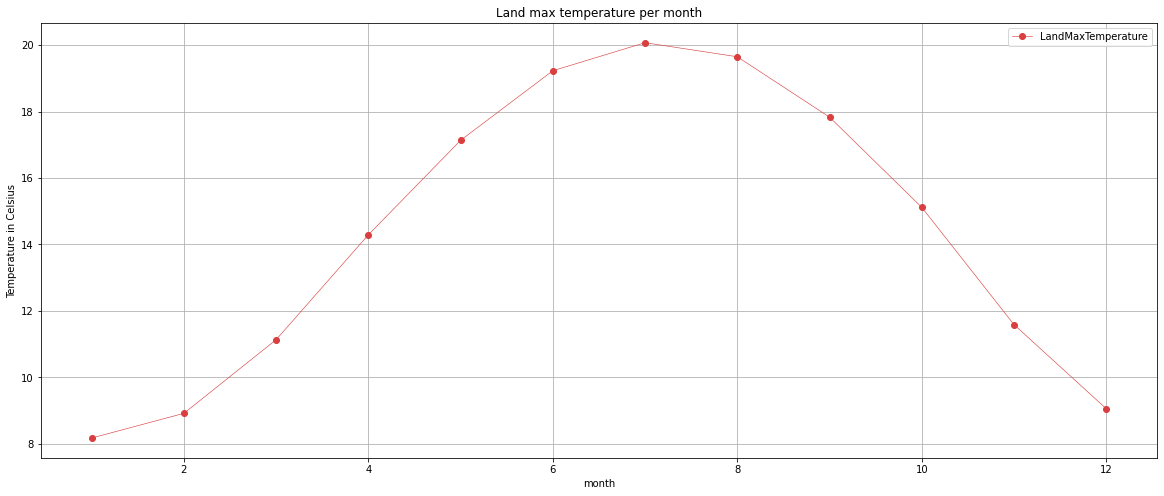

In [21]:
makeOnePlot(tempByMonth.LandMaxTemperature, 'Land max temperature per month', 'month', '#DA3E3E')

### Wykres zmian średniej temperatury lądu względem miesięcy

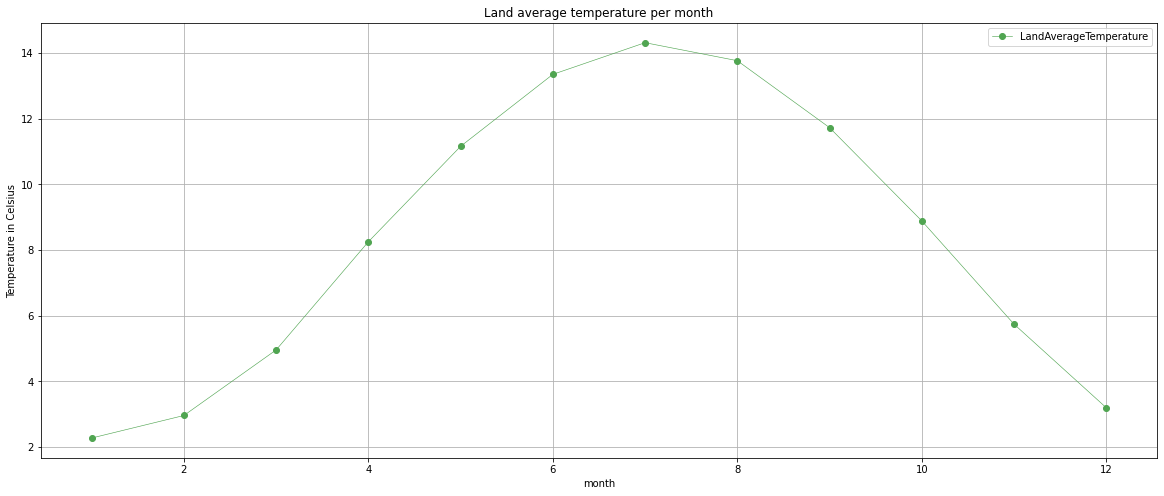

In [22]:
makeOnePlot(tempByMonth.LandAverageTemperature, 'Land average temperature per month', 'month', '#50A551')

### Wykres zmian minimalnej temperatury lądu względem miesięcy

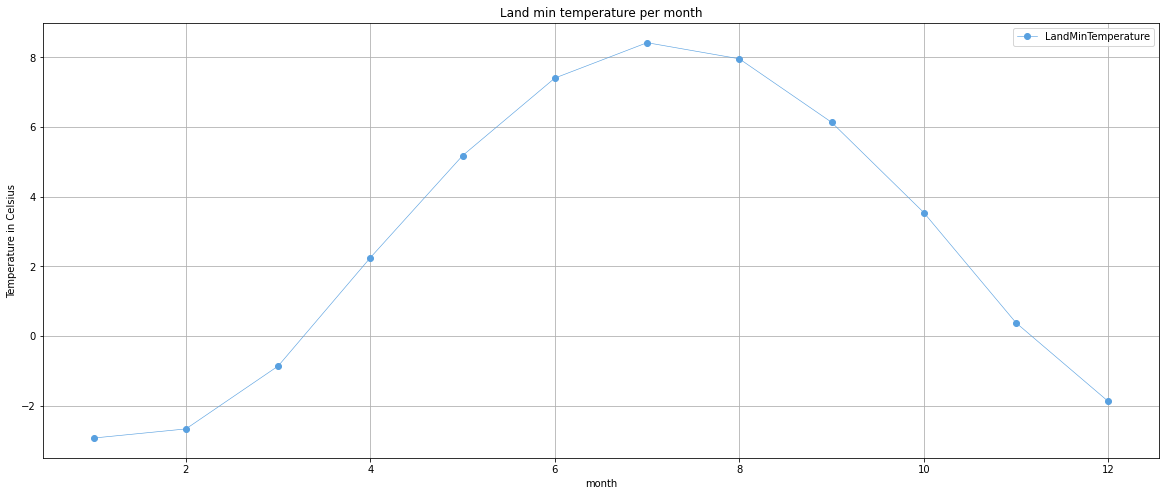

In [23]:
makeOnePlot(tempByMonth.LandMinTemperature, 'Land min temperature per month', 'month', '#58A0E0')

### Wykres zmian średniej temperatury lądu i oceanu względem miesięcy

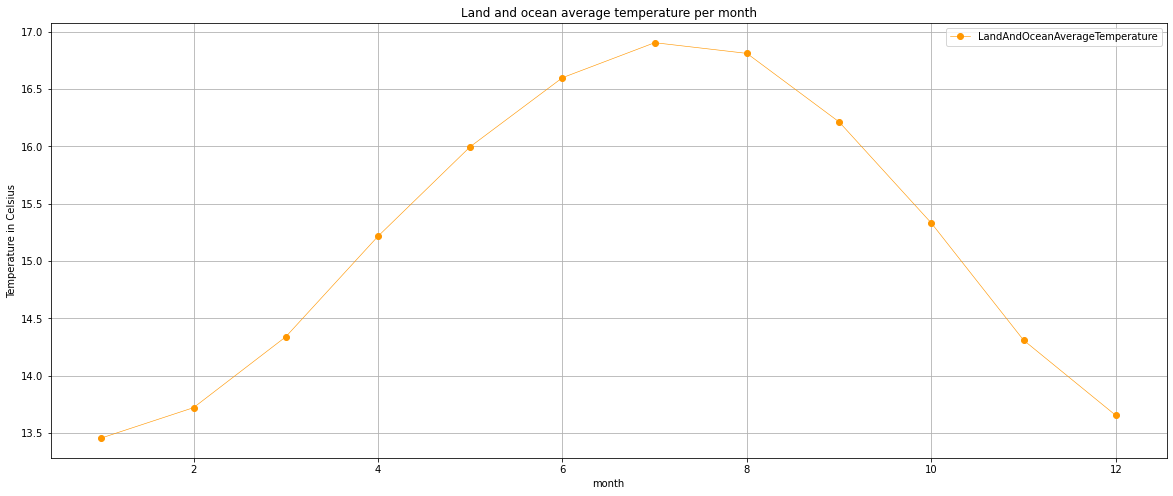

In [24]:
makeOnePlot(
    tempByMonth.LandAndOceanAverageTemperature, 
    'Land and ocean average temperature per month', 'month', '#FF9700'
)

### Zestawienie zmian maksymalnej, średniej oraz minimalnej temperatury lądu względem miesięcy

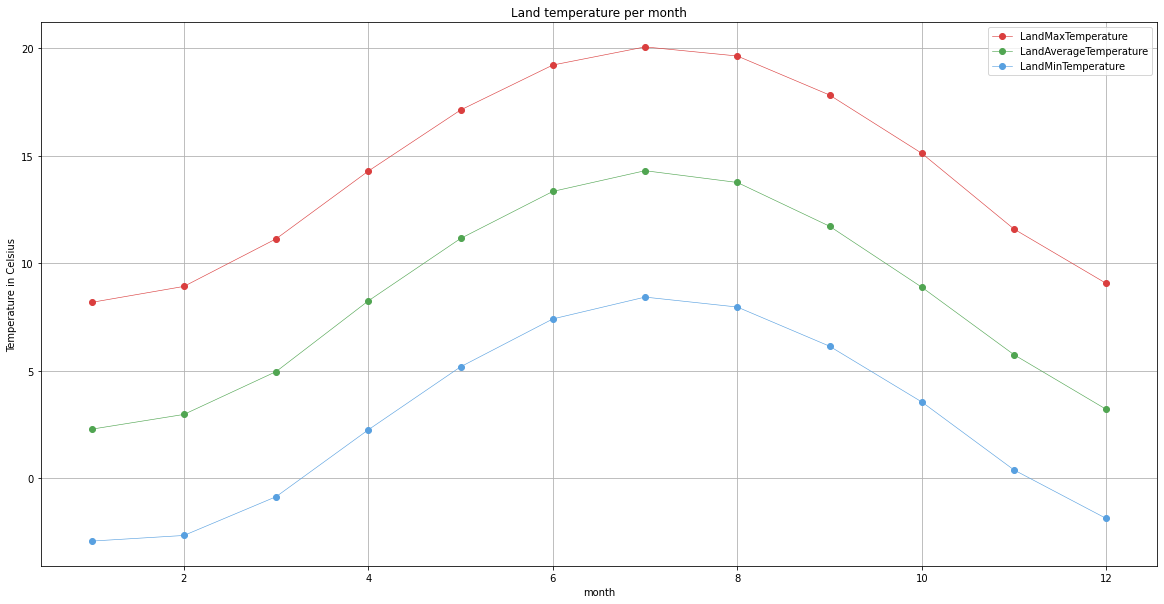

In [25]:
makeThreePlot(tempByMonth, 'Land temperature per month', 'month')